In [316]:
import pandas as pd

In [317]:
# set the directory to where the data is
import os

os.chdir(r"D:\Gene_Project")

In [318]:
unsupervised_data = pd.read_csv(r"all_unsupervised_genes.csv")

In [319]:
unsupervised_data.head()

,sequence
0,"1.A.72,MerR,GH23"
1,"3.A.1,CE4"
2,"3.A.23,9.A.5,MCPsignal,2.A.21,2.A.22,TetR_N,3...."
3,"CE4,8.A.5,3.A.1,3.A.1,3.A.1"
4,"GT51,Peripla_BP_2,3.A.1,3.A.1,9.B.169"


In [320]:
# load the data - new data that was provided
supervised_data = pd.read_csv(r"pul_seq_low_high_substr_year_corrected.csv")

In [321]:
supervised_strings = supervised_data["sig_gene_seq"]

In [322]:
from sklearn.preprocessing import LabelEncoder

In [323]:
le = LabelEncoder()

In [324]:
supervised_data["high_level_substr"].value_counts()

multiple_substrates           139
mono/di/trisaccharide          78
capsule polysaccharide         60
algal glycans                  40
pectin                         38
xylan                          38
O-antigen                      37
galactan                       36
alpha-glucan                   23
beta-mannan                    19
cellulose                      18
chitin                         15
glycosaminoglycan              14
beta-glucan                    13
N-glycan                       12
exopolysaccharide              10
-                               9
fructan                         8
alpha-mannan                    8
host glycan                     7
xyloglucan                      7
plant polysaccharide            6
glycoprotein                    6
human milk oligosaccharide      5
hemicellulose                   5
O-glycan                        3
Name: high_level_substr, dtype: int64

In [325]:
to_keep = supervised_data["high_level_substr"].value_counts().keys()[:5].tolist()

In [326]:
supervised_data["high_level_substr"] = [label if label in to_keep else "others" for label in supervised_data["high_level_substr"]]

In [327]:
le.fit(supervised_data["high_level_substr"])

LabelEncoder()

In [328]:
supervised_data["high_level_substr"]  = le.transform(supervised_data["high_level_substr"])

In [329]:
from sklearn.model_selection import train_test_split

In [371]:
X_train, X_test, y_train, y_test = train_test_split(supervised_data["sig_gene_seq"],
                                                    supervised_data["high_level_substr"], 
                                                   test_size=0.4, 
                                                   stratify = supervised_data["high_level_substr"], 
                                                   random_state = 42)

In [372]:
from sklearn.model_selection import PredefinedSplit

In [373]:
import numpy as np

In [374]:
X_train_test = np.hstack((X_train, X_test))

In [375]:
test_fold = np.hstack((np.repeat(-1, X_train.shape[0]), 
           np.repeat(0, X_test.shape[0])))

In [376]:
pds = PredefinedSplit(test_fold)

In [377]:
from sklearn.ensemble import RandomForestClassifier

In [378]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

In [379]:
from sklearn.feature_extraction.text import CountVectorizer

In [380]:
from sklearn.semi_supervised import SelfTrainingClassifier

In [381]:
# SelfTraining Pipeline
st_pipeline = Pipeline(
    [
        ("vect", CountVectorizer(tokenizer=lambda x: str(x).replace("|", ",").split(','),
                                              lowercase = False)),
        ("clf", SelfTrainingClassifier(RandomForestClassifier(n_jobs = 6), verbose=True))
    ]
)

In [382]:
from sklearn.model_selection import cross_val_score

In [383]:
from tqdm.notebook import tqdm

In [387]:
y_mask = np.random.rand(len(y_train)) < 0.5

In [388]:
y_temp = y_train.copy()

In [390]:
y_temp[~y_mask] = -1

In [392]:
y_train_test = np.hstack((y_temp, 
           y_test))

In [393]:
cross_val_score(st_pipeline, X_train_test, y_train_test, cv = pds)

End of iteration 1, added 58 new labels.
End of iteration 2, added 10 new labels.
End of iteration 3, added 10 new labels.
End of iteration 4, added 6 new labels.
End of iteration 5, added 1 new labels.
End of iteration 6, added 3 new labels.
End of iteration 7, added 3 new labels.
End of iteration 8, added 3 new labels.
End of iteration 9, added 2 new labels.
End of iteration 10, added 1 new labels.


array([0.6221374])

In [403]:
np.random.seed(42)
catch = []
for prop in tqdm([min(prop,1) if prop > 1 else max(0.009, prop) for prop in np.arange(0,11,1)/10]):
    print(prop)
    y_mask = np.random.rand(len(y_train)) < prop
    y_temp = y_train.copy()
    y_temp[~y_mask] = -1
    y_train_test = np.hstack((y_temp, 
           y_test))
    catch.append(cross_val_score(st_pipeline, X_train_test, y_train_test, cv = pds)[0])
    print(cross_val_score(st_pipeline, X_train_test, y_train_test, cv = pds)[0])

  0%|          | 0/11 [00:00<?, ?it/s]

0.009
End of iteration 1, added 342 new labels.
End of iteration 2, added 44 new labels.
End of iteration 3, added 3 new labels.
End of iteration 1, added 356 new labels.
End of iteration 2, added 33 new labels.
0.4580152671755725
0.1
End of iteration 1, added 68 new labels.
End of iteration 2, added 78 new labels.
End of iteration 3, added 63 new labels.
End of iteration 4, added 76 new labels.
End of iteration 5, added 20 new labels.
End of iteration 6, added 6 new labels.
End of iteration 7, added 6 new labels.
End of iteration 8, added 5 new labels.
End of iteration 9, added 2 new labels.
End of iteration 10, added 1 new labels.
End of iteration 1, added 49 new labels.
End of iteration 2, added 92 new labels.
End of iteration 3, added 59 new labels.
End of iteration 4, added 67 new labels.
End of iteration 5, added 28 new labels.
End of iteration 6, added 2 new labels.
End of iteration 7, added 4 new labels.
End of iteration 8, added 3 new labels.
End of iteration 9, added 5 new la

C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\semi_supervised\_self_training.py:205: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


0.6526717557251909


C:\Users\vedpi\anaconda3\envs\newone\lib\site-packages\sklearn\semi_supervised\_self_training.py:205: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


In [405]:
import matplotlib.pyplot as plt

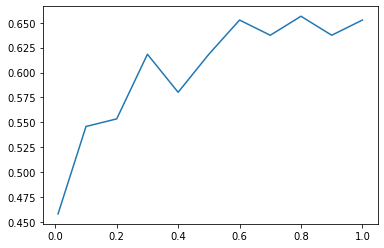

In [408]:
plt.plot([min(prop,1) if prop > 1 else max(0.009, prop) for prop in np.arange(0,11,1)/10], catch)
plt.show()